In [44]:
import os

if not os.getcwd().endswith('Dissertation'):
    os.chdir('..')

In [45]:
import pandas as pd
import numpy as np
from glob import glob

q1_means = []
q2_means = []
for i in glob('Data\\test_csv\\*_results\\*'):
    data = pd.read_csv(i)
    sign = -1 if np.mean(data['Q1_means'] - data['Q1_cutoff'].unique()) <= 0 else 1
    q1_means.append(sign * np.abs(np.mean(data['Q1_means']) - data['Q1_cutoff'].unique()[0]))
    q2_means.append(np.abs(np.mean(data['Q2_means']) - data['Q2_cutoff'].unique()[0]))

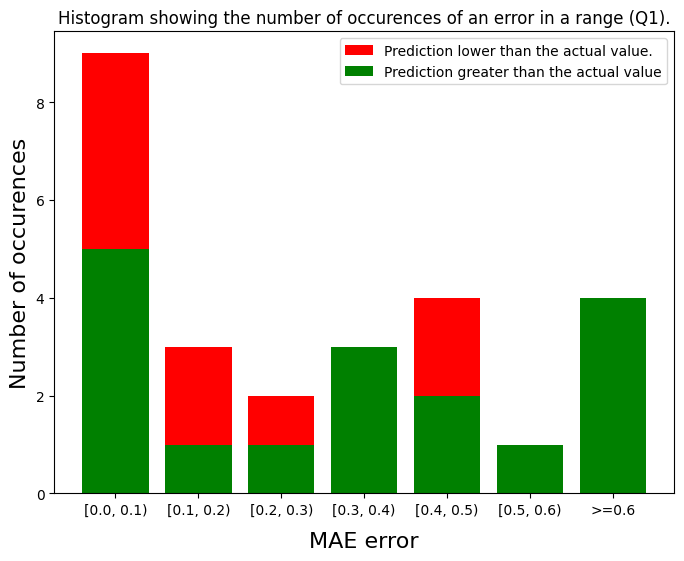

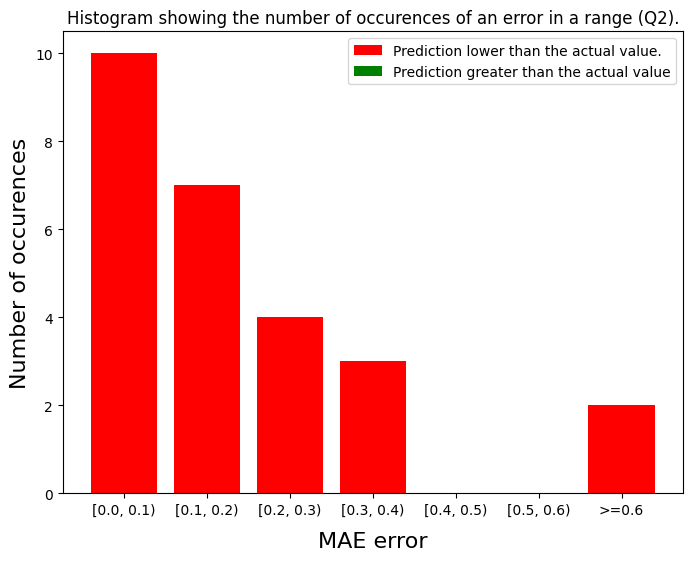

In [46]:
import matplotlib.pyplot as plt

def put_into_bins(data_points, bins):
    less_than_zero_araray = np.array(data_points) < 0
    data_points = np.abs(data_points)
    bin_height = dict()
    for i in range(len(bins) - 1):
        bin_height[f'[{float(bins[i])}, {bins[i + 1]})'] = [0, 0]
    bin_height[f'>={bins[-1]}'] = [0, 0]
    for point, less_than_zero in zip(data_points, less_than_zero_araray):
        found = False
        for i in range(len(bins) - 1):
            if (point < bins[i + 1]) and (point >= bins[i]):
                if less_than_zero:
                    bin_height[f'[{float(bins[i])}, {bins[i + 1]})'][0] += 1
                else:
                    bin_height[f'[{float(bins[i])}, {bins[i + 1]})'][1] += 1
                found = True
        if not found:
            if less_than_zero:
                bin_height[f'>={bins[-1]}'][0] += 1
            else:
                bin_height[f'>={bins[-1]}'][1] += 1
    return bin_height


for session, data in [('Q1', q1_means), ('Q2', q2_means)]:
    bins = put_into_bins(data, [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
    data = np.array(data)


    plt.figure(figsize=(8, 6), dpi=100)
    plt.xlabel('MAE error', fontsize=16, labelpad=10)
    plt.ylabel('Number of occurences', fontsize=16)
    plt.title(f'Histogram showing the number of occurences of an error in a range ({session}).')
    plt.bar(bins.keys(), [sum(i) for i in bins.values()], color='red',
            label='Prediction lower than the actual value.')
    plt.bar(bins.keys(), [i[0] for i in bins.values()], color='green',
            label='Prediction greater than the actual value')
    plt.legend()
    plt.savefig(f'Data\\plots\\Cutoff_Error_Histogram_{session}.png')
    plt.show()